In [1]:
import math
import matplotlib.pyplot as plt  
import numpy as np
from scipy.optimize import fsolve

1. x: M/m
2. y: c/m*sqrt(s/k)
3. z: v/m
4. k_s: sqrt(k/s)

In [41]:
def delta_squared(x, y, z, k_s):
    tmp1 = 2*(y+z)**2 + (2*k_s*y+math.sqrt(x**2+z**2)+2*z*(z+y))**2
    return tmp1
    tmp2 = (1+k_s**2)*(k_s*y+z) + (2*k_s*y+math.sqrt(x**2+z**2)/k_s+z*(1+1/k_s)*(z+y*k_s))**2
    return max(tmp1, tmp2)

In [34]:
def f1(x, y, z, k_s):
    return 0.5 - y*math.sqrt(2)

In [40]:
def f2(x, y, z, k_s):
    return y**2 + x*y**2/2+(y+y*z+x*y*z)*math.sqrt(delta_squared(x, y, z, k_s))+x*(1+z**2)/2*delta_squared(x, y, z, k_s)

In [36]:
def f(x, y, z, k_s):
    return f1(x, y, z, k_s) - f2(x, y, z, k_s)

In [43]:
f(1, 0, 0, 0.7)

0.5

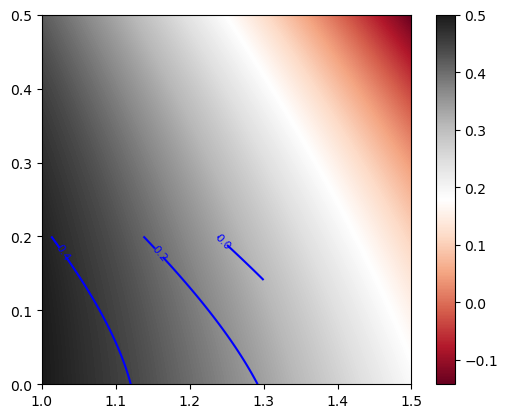

In [44]:
A = np.linspace(1,1.3,500)
C = np.linspace(0,0.2,200)
Z = [[f(a,(a-1)/2,c,0.1) for a in A] for c in C]
contours = plt.contour(A, C, Z, 3, colors='blue')  
plt.clabel(contours, inline=True, fontsize=8) 
plt.imshow(Z, extent=[1, 1.5, 0, 0.5], origin='lower',  
           cmap='RdGy')  
plt.colorbar() 